### Hongfan Lu EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/yt_labeled.csv')

In [3]:
df.shape

(138996, 33)

In [4]:
df.columns

Index(['channel_id', 'channel_name', 'video_id', 'video_title',
       'video_creation_time', 'video_description', 'video_tags',
       'video_viewcount', 'video_likecount', 'video_commentcount',
       'comment_id', 'comment_author_id', 'comment_text', 'comment_time',
       'comment_likecount', 'comment_replycount', 'genre', 'cleaned_comment',
       'tokenized_comment', 'toxicity', 'severe_toxicity', 'identity_attack',
       'insult', 'profanity', 'threat', 'neg', 'neu', 'pos', 'compound',
       'polarity', 'subjectivity', 'negative_emotion', 'positive_emotion'],
      dtype='object')

In [5]:
simple_df = df[['channel_name','video_title', 'video_creation_time', 
                'video_viewcount','video_likecount', 'video_commentcount','comment_time',
       'comment_likecount', 'comment_replycount', 'genre', 'cleaned_comment',
       'tokenized_comment', 'toxicity', 'severe_toxicity', 'identity_attack',
       'insult', 'profanity', 'threat', 'neg', 'neu', 'pos', 'compound',
       'polarity', 'subjectivity', 'negative_emotion', 'positive_emotion']]

In [6]:
all_games = [
    "call of duty", "gta", "the last of us", "god of war", "batman", 
    "red dead redemption", "assassin's creed", "star wars jedi", 
    "resident evil", "cyberpunk", "fallout", "tomb raider", "elden ring",
    "minecraft", "pokemon go", "just dance", "it takes two", "uncharted",
    "brawl stars"]

In [7]:
simple_df['video_title_lower'] = simple_df['video_title'].str.lower()
simple_df['game'] = simple_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
simple_df.drop(columns=['video_title_lower'], inplace=True)

/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_25471/3244421465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_df['video_title_lower'] = simple_df['video_title'].str.lower()
/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_25471/3244421465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_df['game'] = simple_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T

In [8]:
simple_df.head(2)

,channel_name,video_title,video_creation_time,video_viewcount,video_likecount,video_commentcount,comment_time,comment_likecount,comment_replycount,genre,...,threat,neg,neu,pos,compound,polarity,subjectivity,negative_emotion,positive_emotion,game
0,PewDiePie,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,11540558.0,473052.0,15129.0,2022-05-02 19:37:22+00:00,9818.0,47.0,action,...,0.138155,0.315,0.572,0.113,-0.6395,0.400000,0.400000,0.066667,0.0,elden ring
1,PewDiePie,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,11540558.0,473052.0,15129.0,2022-12-14 23:36:11+00:00,6251.0,9.0,action,...,0.009515,0.000,0.703,0.297,0.5859,0.345238,0.345238,0.000000,0.1,elden ring


In [9]:
sentiment_measures = ['toxicity','severe_toxicity', 'identity_attack','insult', 'profanity', 'threat', 'neg', 'neu', 'pos', 'compound', 'polarity', 'subjectivity','negative_emotion', 'positive_emotion']

## Toxicity by Game  

In [10]:
game_toxicity = simple_df.groupby('game')[sentiment_measures].mean().sort_values(by = 'toxicity', ascending=False)

Text(0.5, 1.0, 'Toxicity Scores of Video Games')

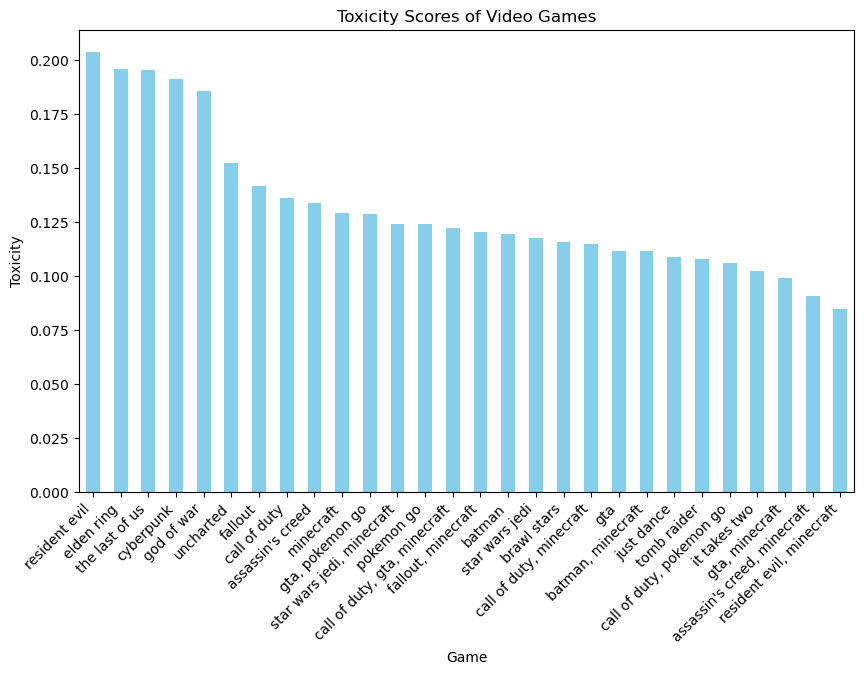

In [11]:
game_toxicity_plot = game_toxicity['toxicity']

plt.figure(figsize = (10, 6))
ax = game_toxicity_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('Game')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Toxicity')
plt.title('Toxicity Scores of Video Games')

In [12]:
# simple_df.groupby(['genre','game']).mean()

## Toxicity by Channel

In [13]:
channel_toxicity = simple_df.groupby('channel_name')[sentiment_measures].mean().sort_values(by = 'toxicity', ascending=False)

Text(0.5, 1.0, 'Toxicity Scores by YouTuber')

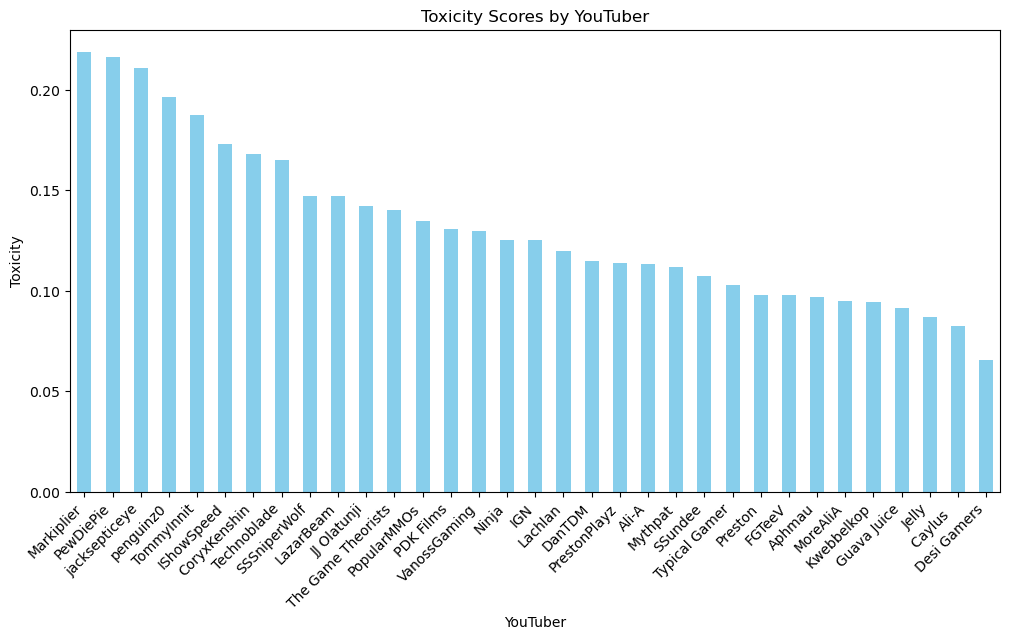

In [14]:
channel_toxicity_plot = channel_toxicity['toxicity']

plt.figure(figsize = (12, 6))
ax = channel_toxicity_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('YouTuber')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Toxicity')
plt.title('Toxicity Scores by YouTuber')

## Investigating Why different YouTuber has different Toxicity Means?

In [15]:
# Pivot to calculate unique count of video titles for each channel and genre
count_vid_by_channel_genre = simple_df.pivot_table(index='channel_name', columns='genre', values='video_title', aggfunc='nunique', fill_value=0).reset_index()

# Rename columns for clarity
count_vid_by_channel_genre.rename(columns={'action': 'action_count', 'non-action': 'non_action_count'}, inplace=True)

In [16]:
count_vid_by_channel_genre.head(3)

genre,channel_name,action_count,non_action_count
0,Ali-A,29,9
1,Aphmau,1,30
2,Caylus,29,30


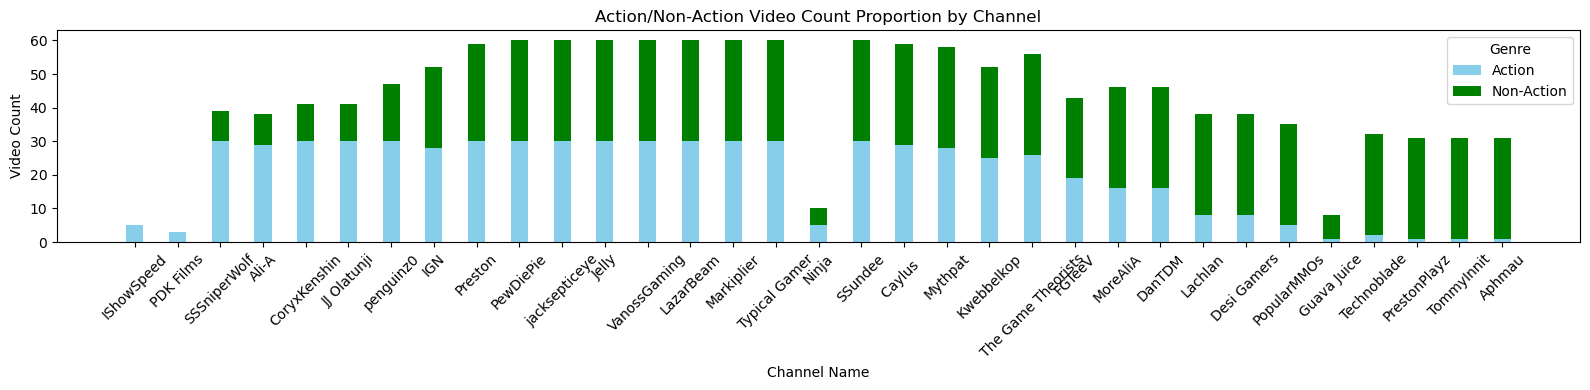

In [24]:
plt.figure(figsize=(16, 4))

# Plot action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['action_count'], color='skyblue', width=0.4, label='Action')

# Plot non-action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['non_action_count'], color='green', width=0.4, label='Non-Action', bottom = count_vid_by_channel_genre['action_count'])

# Adding labels and title
plt.xlabel('Channel Name')
plt.ylabel('Video Count')
plt.title('Action/Non-Action Video Count Proportion by Channel')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
count_vid_by_channel_genre['action_video_%'] = round(100*(count_vid_by_channel_genre['action_count']/(count_vid_by_channel_genre['action_count']+ count_vid_by_channel_genre['non_action_count'])),2)

In [19]:
count_vid_by_channel_genre = count_vid_by_channel_genre.merge(channel_toxicity['toxicity'], left_on= 'channel_name', right_index=True,how = 'left')

In [20]:
count_vid_by_channel_genre = count_vid_by_channel_genre.sort_values(by = 'action_video_%', ascending = False).reset_index(drop = True)

In [21]:
count_vid_by_channel_genre

,channel_name,action_count,non_action_count,action_video_%,toxicity
0,IShowSpeed,5,0,100.00,0.173149
1,PDK Films,3,0,100.00,0.131037
2,SSSniperWolf,30,9,76.92,0.147461
3,Ali-A,29,9,76.32,0.113281
4,CoryxKenshin,30,11,73.17,0.168041
5,JJ Olatunji,30,11,73.17,0.142374
6,penguinz0,30,17,63.83,0.196428
7,IGN,28,24,53.85,0.125393
8,Preston,30,29,50.85,0.098132
9,PewDiePie,30,30,50.00,0.216254


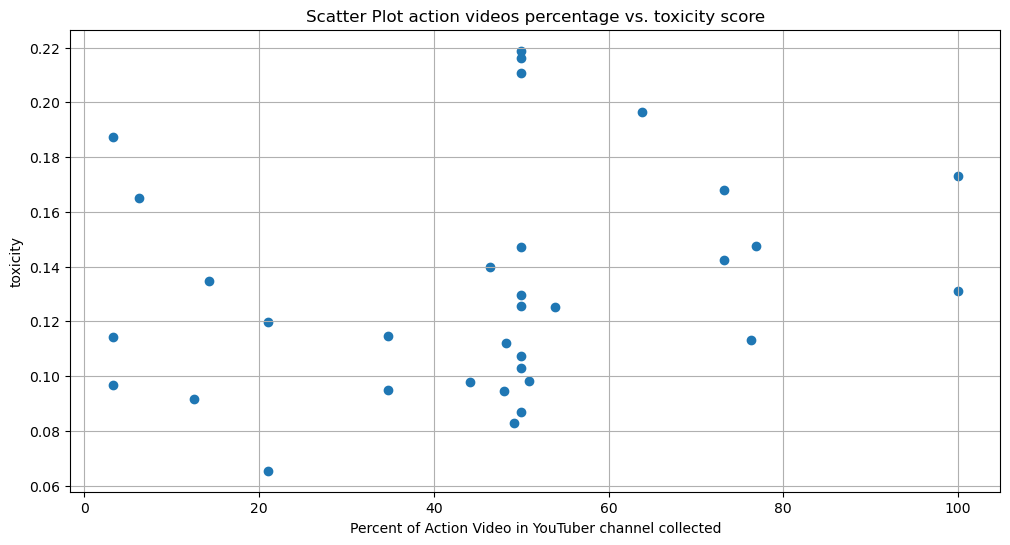

In [22]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(count_vid_by_channel_genre['action_video_%'], count_vid_by_channel_genre['toxicity'])
plt.xlabel('Percent of Action Video in YouTuber channel collected')
plt.ylabel('toxicity')
plt.title('Scatter Plot action videos percentage vs. toxicity score')
plt.grid(True)
plt.show()

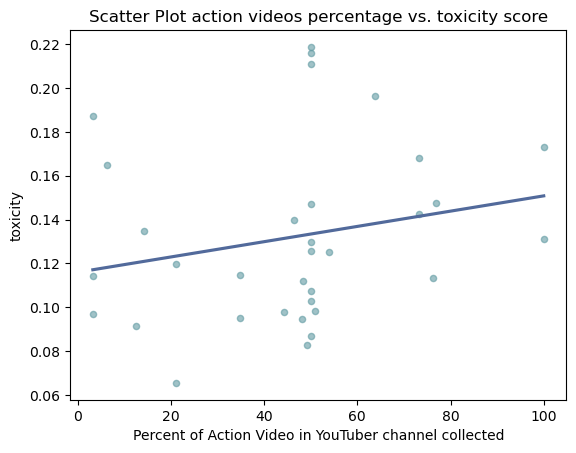

In [23]:
sns.regplot(x = 'action_video_%', y = 'toxicity', data = count_vid_by_channel_genre, ci = None,
                line_kws = {"color": "#526A9B"},
                scatter_kws = {"s": 20, "color": "#619AA2", "alpha": 0.6})
plt.xlabel('Percent of Action Video in YouTuber channel collected')
plt.ylabel('toxicity')
plt.title('Scatter Plot action videos percentage vs. toxicity score')
# plt.grid(True)
plt.show()